# Lab 2

### For this lab you need subsample with 5-10 random variables, at least half of them should be described with continuous random variable type. Target variableshould be continuous.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

In [83]:
# read data
source_data_path = "./../tcs_stock.csv"

In [84]:
row_df = pd.read_csv(source_data_path)
row_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2015-12-24,TCS,EQ,2425.80,2421.00,2438.20,2404.00,2435.00,2434.25,2424.03,421580,1.021924e+14,21932,188670,0.4475
244,2015-12-28,TCS,EQ,2434.25,2428.00,2466.40,2420.20,2456.95,2462.70,2455.00,1852099,4.546896e+14,43390,1060100,0.5724
245,2015-12-29,TCS,EQ,2462.70,2458.35,2465.30,2445.75,2449.35,2455.80,2452.26,854262,2.094875e+14,26975,433986,0.5080
246,2015-12-30,TCS,EQ,2455.80,2453.05,2459.00,2412.30,2421.70,2418.30,2442.06,802881,1.960682e+14,49464,632180,0.7874


In [85]:
df = row_df[[ 'High', 'Open', 'Low', 'Last', 'Close', 'Trades', '%Deliverble']]

feature_cols = ['Open', 'Low', 'Last', 'Close', 'Trades', '%Deliverble']
features = df[feature_cols]
target = df['High']

df

,High,Open,Low,Last,Close,Trades,%Deliverble
0,2567.00,2567.00,2541.00,2550.00,2545.55,8002,0.2883
1,2590.95,2551.00,2550.60,2588.40,2579.45,27585,0.6683
2,2599.90,2581.00,2524.65,2538.10,2540.25,43234,0.5207
3,2529.10,2529.10,2440.00,2450.05,2446.60,84503,0.5894
4,2479.15,2470.00,2407.45,2426.90,2417.70,101741,0.6724
...,...,...,...,...,...,...,...
243,2438.20,2421.00,2404.00,2435.00,2434.25,21932,0.4475
244,2466.40,2428.00,2420.20,2456.95,2462.70,43390,0.5724
245,2465.30,2458.35,2445.75,2449.35,2455.80,26975,0.5080
246,2459.00,2453.05,2412.30,2421.70,2418.30,49464,0.7874


## Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV)

In [ ]:
??

## Step 2. You need to make an estimation of multivariate mathematical expectation and variance.

In [51]:
df.mean()

Open                    2542.172782
High                    2563.580444
Low                     2514.408468
Last                    2538.039718
Close                   2537.717944
Trades                 66873.608871
Deliverable Volume    796057.548387
dtype: float64

In [52]:
df.var()

Open                  7.674758e+03
High                  8.208064e+03
Low                   6.881163e+03
Last                  7.542802e+03
Close                 7.579063e+03
Trades                8.342223e+08
Deliverable Volume    1.857533e+11
dtype: float64

## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

In [53]:
condition = df['Trades'] >= 66000
condition_2 = df['Trades'] < 66000

df_cond = df[condition]

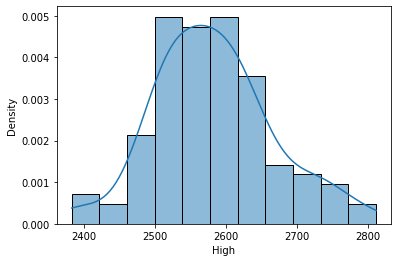

In [54]:
sb.histplot(df_cond['High'], kde=True, stat="density")
plt.show()

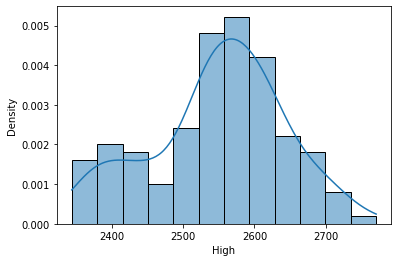

In [55]:
sb.histplot(df[condition_2]['High'], kde=True, stat="density")
plt.show()

In [56]:
df_cond.mean()

Open                  2.558013e+03
High                  2.582467e+03
Low                   2.523619e+03
Last                  2.550018e+03
Close                 2.549430e+03
Trades                9.230955e+04
Deliverable Volume    1.067055e+06
dtype: float64

In [57]:
df_cond.var()

Open                  6.191144e+03
High                  7.031163e+03
Low                   5.887515e+03
Last                  6.700395e+03
Close                 6.871748e+03
Trades                5.982571e+08
Deliverable Volume    1.824419e+11
dtype: float64

## Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

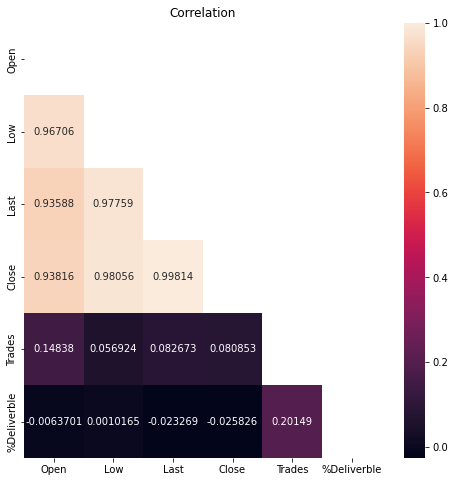

In [65]:
fig, ax = plt.subplots(figsize=(8,8))

corr = features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, ax=ax, vmax=1, fmt='.5g')

plt.title('Correlation')
plt.show()

In [179]:
# Было бы круто сделать вывод табличкой - ДатаФреймом
for i, col in enumerate(feature_cols):
    j = i+1

    # stop looping if j reach end of index
    if j >= len(feature_cols):
        break

    for k in range(j, len(feature_cols)):

        col2 = feature_cols[k]

        x1, x2 = df[col], df[col2]
        coeff, p = st.pearsonr(x1, x2)
        coeff_z = np.arctanh(coeff)

        std = 1/np.sqrt(x1.size-3)
        alpha = 0.05
        z = st.norm.ppf(1-alpha/2)
        low_z, high_z = coeff_z-z*std, coeff_z+z*std
        
        print('%s - %s' % (col, col2))
        print('Correlation coeff = ', coeff)
        print('Confidence interval = ', low_z, high_z)
        print('-----')

Open - Low
Correlation coeff =  0.9670627443358553
Confidence interval =  1.9196286483361922 2.170063659929501
-----
Open - Last
Correlation coeff =  0.9358755281702829
Confidence interval =  1.5785269469962178 1.8289619585895267
-----
Open - Close
Correlation coeff =  0.9381587421838884
Confidence interval =  1.59724397194783 1.847678983541139
-----
Open - Trades
Correlation coeff =  0.1483773741275415
Confidence interval =  0.02426336652397429 0.27469837811728326
-----
Open - %Deliverble
Correlation coeff =  -0.006370080561552945
Confidence interval =  -0.13158767252185857 0.11884733907145043
-----
Low - Last
Correlation coeff =  0.977593184109987
Confidence interval =  2.114917807868333 2.3653528194616418
-----
Low - Close
Correlation coeff =  0.9805585991928968
Confidence interval =  2.1866471693481864 2.4370821809414953
-----
Low - Trades
Correlation coeff =  0.056923637143543565
Confidence interval =  -0.06823226561195304 0.18220274598135594
-----
Low - %Deliverble
Correlation co

## Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target -predictors).

Задача - рассчитать значение High, имея набор предикторов 

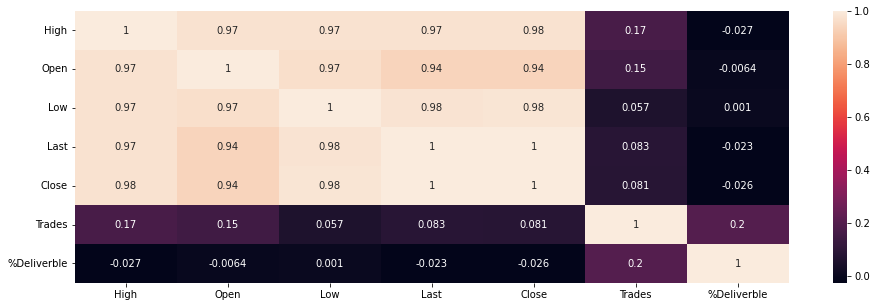

In [78]:
plt.figure(figsize=(16, 5))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

Use PCA method

In [79]:
std_df = scale(df)
std_df = pd.DataFrame(std_df, index=df.index, columns=df.columns)

In [80]:
std_df.head()

,High,Open,Low,Last,Close,Trades,%Deliverble
0,0.037820,0.283970,0.321211,0.137992,0.090146,-2.042407,-4.208179
1,0.302709,0.100965,0.437173,0.581031,0.480330,-1.363023,-0.022430
2,0.401696,0.444101,0.123712,0.000696,0.029144,-0.820119,-1.648263
3,-0.381355,-0.149525,-0.898812,-1.015180,-1.048754,0.611609,-0.891524
4,-0.933805,-0.825503,-1.291997,-1.282272,-1.381388,1.209639,0.022732


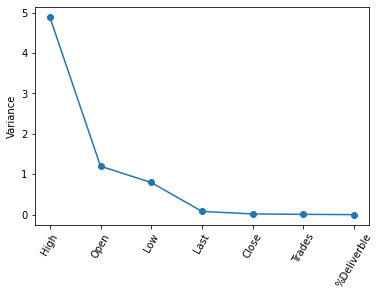

In [81]:
pca = PCA().fit(std_df)
y = np.std(pca.transform(std_df), axis=0)**2
x = np.arange(len(y)) + 1
plt.plot(x, y, "o-")
plt.xticks(x, df.columns, rotation=60)
plt.ylabel("Variance")
plt.show()

I think that 3 features is ok. Let's use Open, Close, Trades

## Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [141]:
train, test = train_test_split(df[['High', 'Open', 'Close', 'Low', 'Trades']].copy())

train_feature = train[['Open', 'Close', 'Low', 'Trades']]
test_feature = test[['Open', 'Close', 'Low', 'Trades']]

train_target = train['High']
test_target = test['High']


In [143]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

In [170]:
tab = [["Type", "MSE", "R2", "Coeff"]]

regression = lm.LinearRegression()
regression.fit(train_feature, train_target)
predicted = regression.predict(test_feature)
tab.append(["Least Squares model", str(mean_squared_error(test_target, predicted)), str(r2_score(test_target, predicted)), str(regr.coef_)])

regression = lm.Lasso(alpha=0.0001, random_state=5)
regression.fit(train_feature, train_target)
predicted = regression.predict(test_feature)
tab.append(["Lasso model", str(mean_squared_error(test_target, predicted)), str(r2_score(test_target, predicted)), str(regr.coef_)])

regression = lm.Ridge(random_state=1)
regression.fit(train_feature, train_target)
predicted = regression.predict(test_feature)
tab.append(["Ridge model", str(mean_squared_error(test_target, predicted)), str(r2_score(test_target, predicted)), str(regr.coef_)])

print(tabulate(tab, headers="firstrow", tablefmt="grid"))

+---------------------+---------+----------+-------------------------------------------------------------------+
| Type                |     MSE |       R2 | Coeff                                                             |
+=====================+=========+==========+===================================================================+
| Least Squares model | 153.272 | 0.983746 | [ 5.07494249e-01  6.72097748e-01 -1.52136856e-01  1.38950477e-04] |
+---------------------+---------+----------+-------------------------------------------------------------------+
| Lasso model         | 153.272 | 0.983746 | [ 5.07494249e-01  6.72097748e-01 -1.52136856e-01  1.38950477e-04] |
+---------------------+---------+----------+-------------------------------------------------------------------+
| Ridge model         | 153.274 | 0.983746 | [ 5.07494249e-01  6.72097748e-01 -1.52136856e-01  1.38950477e-04] |
+---------------------+---------+----------+----------------------------------------------------

## Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).

r^2 can be find above at the end of Step 6

In [168]:
regression = lm.LinearRegression()
regression.fit(train_feature, train_target)
predicted = regr.predict(test_feature)

print('R^2 =', r2_score(test_target, predicted))


R^2 = 0.9837459902926684


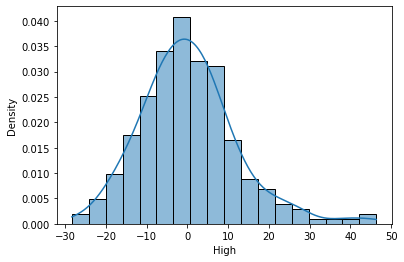

In [175]:
residuals = df['High'] - regression.predict(df[['Open', 'Close', 'Low', 'Trades']])
ax = sns.histplot(residuals, kde = 'True', stat="density", label=f'Distribution of residuals for {target}')

In [177]:
scipy.stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.var()))

KstestResult(statistic=0.4247823901156449, pvalue=4.0790645008566427e-41)

residuals are not distibuted normally and idk is it good or bad in that case